In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

In [2]:
#model to run on cuda
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [4]:
df= pd.read_csv('/content/userrevfinaldoc.csv')

In [ ]:
df = pd.read_csv('/content/product1.csv', encoding='latin-1') # Try 'latin-1' encoding first

In [5]:
df


,product_fullName,product_url,text,cleaned_text,review_rating,review_date
0,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Delightful Seems to be performing as expected....,"['delightful', 'seems', 'performing', 'expecte...",positive,"Aug, 2022"
1,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,"Fabulous! Okay so, at first i was worried as h...","['fabulous', 'okay', 'first', 'worried', 'hell...",positive,"Sep, 2022"
2,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Terrific Pacaging was not good and obviously i...,"['terrific', 'pacaging', 'good', 'obviously', ...",positive,"Oct, 2022"
3,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,"Terrific purchase Processor is very good, its ...","['terrific', 'purchase', 'processor', 'good', ...",positive,"Aug, 2022"
4,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Brilliant Good mast candishen power full proce...,"['brilliant', 'good', 'mast', 'candishen', 'po...",positive,"May, 2023"
...,...,...,...,...,...,...
1175,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Perfect product! Good ???,"['perfect', 'product', 'good']",positive,"Feb, 2023"
1176,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Excellent Supb. Product,"['excellent', 'supb', 'product']",positive,"Jan, 2023"
1177,intel-i9-13900kf-2-2-ghz-lga1700-socket-8-core...,https://www.flipkart.com/intel-i9-13900kf-2-2-...,Excellent Get performance for machine learning...,"['excellent', 'get', 'performance', 'machine',...",positive,11 months ago
1178,intel-core-i7-2600-2nd-gen-quad-core-8mb-cache...,https://www.flipkart.com/intel-core-i7-2600-2n...,Useless product Not working and waste of money...,"['useless', 'product', 'working', 'waste', 'mo...",negative,"Apr, 2023"


In [6]:
# keeping text cleaned text and review_rating of df and rest drop

df = df[['text','cleaned_text', 'review_rating']]
df.head()


,text,cleaned_text,review_rating
0,Delightful Seems to be performing as expected....,"['delightful', 'seems', 'performing', 'expecte...",positive
1,"Fabulous! Okay so, at first i was worried as h...","['fabulous', 'okay', 'first', 'worried', 'hell...",positive
2,Terrific Pacaging was not good and obviously i...,"['terrific', 'pacaging', 'good', 'obviously', ...",positive
3,"Terrific purchase Processor is very good, its ...","['terrific', 'purchase', 'processor', 'good', ...",positive
4,Brilliant Good mast candishen power full proce...,"['brilliant', 'good', 'mast', 'candishen', 'po...",positive


In [8]:
#convert positive to 1 and negative to 0

df['review_rating'] = df['review_rating'].apply(lambda x: 1 if x == 'positive' else 0)


<ipython-input-8-ff82ddba9325>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rating'] = df['review_rating'].apply(lambda x: 1 if x == 'positive' else 0)


In [9]:
df['review_rating'].value_counts()


review_rating
1    1091
0      89
Name: count, dtype: int64

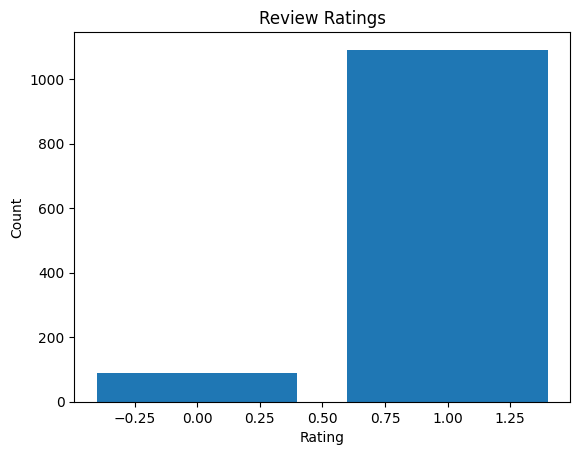

In [10]:
import matplotlib.pyplot as plt

# Get the counts of each review rating
rating_counts = df['review_rating'].value_counts()

# Get the names of each review rating
rating_names = rating_counts.index.to_list()

# Create a bar chart
plt.bar(rating_names, rating_counts)

# Add a title and labels
plt.title('Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


In [11]:
from nltk.tokenize import word_tokenize


<ipython-input-14-66b9931f26ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Words Per Review"] = df["text"].str.split().apply(len)


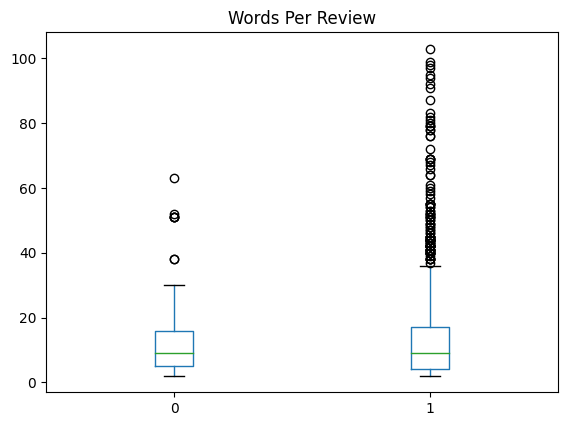

In [14]:
#checking the word lenth using box plot
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="review_rating", grid=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [15]:
#setting parameter for tokeniztion
MAX_LEN = 100
TRAIN_BATCH_SIZE = 9
VALID_BATCH_SIZE = 9
EPOCHS = 5
LEARNING_RATE = 3e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
#defining class of tokenizer
class CustomDataset(Dataset):
    def __init__(self, Tokenizer, dataframe, max_len):
        self.tokenizer = Tokenizer
        self.data = dataframe
        self.text = dataframe.cleaned_text
        self.target = self.data.review_rating
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text = text,
            truncation = None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.target[index], dtype=torch.float)
        }

In [17]:
#split dataset df

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=32)


In [18]:
test_df = test_df.reset_index(drop=True)
test_df

,text,cleaned_text,review_rating,Words Per Review
0,Good choice Good,"['good', 'choice', 'good']",1,3
1,Excellent I got the good processor I can't say...,"['excellent', 'got', 'good', 'processor', 'ca'...",1,41
2,Mind-blowing purchase Excellent,"['mind-blowing', 'purchase', 'excellent']",1,3
3,Just wow! Great product ????,"['wow', 'great', 'product']",1,5
4,Excellent I got the good processor I can't say...,"['excellent', 'got', 'good', 'processor', 'ca'...",1,41
...,...,...,...,...
231,Good choice Good prosecer thanks Flipkart,"['good', 'choice', 'good', 'prosecer', 'thanks...",1,6
232,Mind-blowing purchase Excellent Purchase..it w...,"['mind-blowing', 'purchase', 'excellent', 'pur...",1,44
233,"Mind-blowing purchase super seller, i got my i...","['mind-blowing', 'purchase', 'super', 'seller'...",1,23
234,Very Good Well its good but i dont think there...,"['good', 'well', 'good', 'dont', 'think', ""'s""...",1,18


In [19]:
train_df = train_df.reset_index(drop=True)
train_df

,text,cleaned_text,review_rating,Words Per Review
0,Good Superb,"['good', 'superb']",1,2
1,Highly recommended Very nice ??????,"['highly', 'recommended', 'nice']",1,5
2,Highly recommended Very nice ??????,"['highly', 'recommended', 'nice']",1,5
3,Really Nice Very good processor,"['really', 'nice', 'good', 'processor']",1,5
4,Mind-blowing purchase Best performance,"['mind-blowing', 'purchase', 'best', 'performa...",1,4
...,...,...,...,...
939,Best in the market! It's great,"['best', 'market', ""'s"", 'great']",1,6
940,Nice product Processor is working very good . ...,"['nice', 'product', 'processor', 'working', 'g...",1,54
941,Good quality product Good working on my deskto...,"['good', 'quality', 'product', 'good', 'workin...",1,9
942,Utterly Disappointed Warning. Please don't buy...,"['utterly', 'disappointed', 'warning', 'please...",0,52


In [23]:
training = CustomDataset(tokenizer,train_df, MAX_LEN)
testing = CustomDataset(tokenizer, test_df, MAX_LEN)

In [24]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0}

In [25]:
training_loader = DataLoader(training, **train_params, drop_last = True)

testing_loader=DataLoader(testing, **test_params, drop_last = True)

In [26]:
def extract_hidden_states(batch):

    # Place model inputs on the GPU and convert them to Pytorch tensors.
    inputs = {k:torch.tensor(v).to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy().reshape(-1, 768)}

In [27]:
from transformers import AutoModel

In [ ]:
#model_ckpt = "distilbert-base-uncased"
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

#BERT MODEL CREATION

In [28]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.5)
        self.l3 = torch.nn.Linear(768, 2)

    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [30]:
#Introducing adaptive weights
import torch
from collections import Counter

class_counts = Counter(df['review_rating'])
print("Class Counts:", class_counts)

total_samples = len(df['review_rating'])
class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}
print("Class Weights:", class_weights)

weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float).to(device)
print("Weights Tensor:", weights_tensor)

Class Counts: Counter({1: 1091, 0: 89})
Class Weights: {1: 1.0815765352887259, 0: 13.258426966292134}
Weights Tensor: tensor([13.2584,  1.0816], device='cuda:0')


In [31]:
def loss_fn(outputs, targets):
    return torch.nn.CrossEntropyLoss(weight = weights_tensor)(outputs, targets.long())

In [32]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [33]:
#training function defined
import torch.nn as nn
from tqdm import tqdm
def train(epoch):
    model.train()
    train_acc = 0
    for _,data in enumerate(tqdm(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [34]:
for epoch in range(EPOCHS):
    train(epoch)

  0%|          | 0/104 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  0.6387799382209778


  2%|▏         | 2/104 [00:00<00:15,  6.50it/s]

Epoch: 1, Loss:  0.0265182014554739


  2%|▏         | 2/104 [00:00<00:15,  6.38it/s]

Epoch: 2, Loss:  0.026041096076369286


  1%|          | 1/104 [00:00<00:20,  5.14it/s]

Epoch: 3, Loss:  0.007816840894520283


  2%|▏         | 2/104 [00:00<00:16,  6.05it/s]

Epoch: 4, Loss:  0.003362369490787387


100%|██████████| 104/104 [00:18<00:00,  5.54it/s]


In [35]:
#test function defined
from torch import nn
def validation(epoch):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(tqdm(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            predictions = torch.argmax(nn.functional.softmax(outputs, dim=1), dim = 1)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(predictions.cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [37]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix
for epoch in range(1,10):
    outputs, targets = validation(epoch)
    print(classification_report(outputs, targets))
    accuracy = metrics.accuracy_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
    print(f"Accuracy Score = {accuracy}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")

100%|██████████| 26/26 [00:01<00:00, 15.74it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.54it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.21it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 15.72it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00       213

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9738430583501005


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 15.04it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00       213

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9738430583501005


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.50it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.58it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.53it/s]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00       213

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9738430583501005


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 26/26 [00:01<00:00, 16.44it/s]

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       1.00      1.00      1.00       212

    accuracy                           0.99       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.99      0.99      0.99       234

Accuracy Score = 0.9914529914529915
F1 Score (Micro) = 0.9914529914529915
F1 Score (Macro) = 0.9749142367066895


In [47]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(targets, outputs)


cm

array([[ 21,   1],
       [  1, 211]])

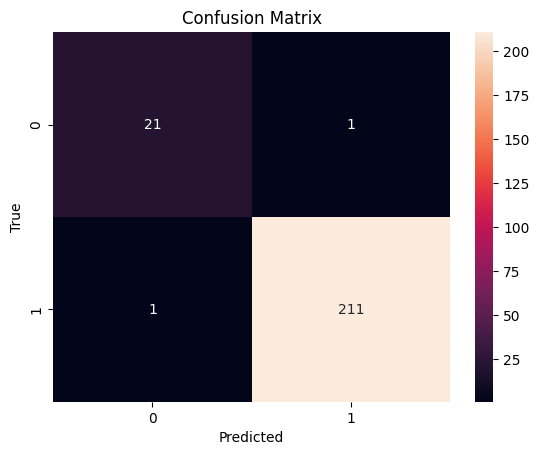

In [61]:

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
#saving model
torch.save(model.state_dict(), "intel_model.pt")


#Using fine tuned BERT model to predict sentiment of technical review

In [ ]:
df1=pd.read_csv("/kaggle/input/topredict/tech2revclean.csv")

In [ ]:
#loading fine tuned BERT
import torch

# Path to your saved fine-tuned BERT model (replace with your actual path)
model_path = "/kaggle/input/model-intel/intel_model.pt"

# Load the fine-tuned model using torch.load
model = torch.load(model_path)



In [ ]:
import torch.nn as nn
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.5)
        self.l3 = torch.nn.Linear(768, 2)

    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output
model = BERTClass()  # Replace with your model class
model.load_state_dict(torch.load("/kaggle/input/model-intel/intel_model.pt"))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<All keys matched successfully>

In [ ]:
df1=pd.read_csv("/kaggle/input/intel-tech/tech2revclean.csv")

In [ ]:
df1['category']=''

In [ ]:
df2=pd.DataFrame()

##since technical dataset was too big we divided it in 200 datapoints gap


In [ ]:
df2 = df1[:200]
df3 = df1[200:400]
df4 = df1[400:600]
df5 = df1[600:800]
df6 = df1[800:1000]
df7 = df1[1000:1200]
df8 = df1[1200:1400]
df9 = df1[1400:1600]
df10 = df1[1600:1800]
df11 = df1[1800:2000]
df12 = df1[2000:2200]
df13 = df1[2200:2400]
df14 = df1[2400:2600]
df15 = df1[2600:2800]
df16 = df1[2800:3000]
df17 = df1[3000:3200]
df18 = df1[3200:3400]
df19 = df1[3400:3600]
df20 = df1[3600:3800]
df21 = df1[3800:4000]
df22 = df1[4000:]

In [ ]:
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)
df5.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)
df7.reset_index(drop=True, inplace=True)
df8.reset_index(drop=True, inplace=True)
df9.reset_index(drop=True, inplace=True)
df10.reset_index(drop=True, inplace=True)
df11.reset_index(drop=True, inplace=True)
df12.reset_index(drop=True, inplace=True)
df13.reset_index(drop=True, inplace=True)
df14.reset_index(drop=True, inplace=True)
df15.reset_index(drop=True, inplace=True)
df16.reset_index(drop=True, inplace=True)
df17.reset_index(drop=True, inplace=True)
df18.reset_index(drop=True, inplace=True)
df19.reset_index(drop=True, inplace=True)
df20.reset_index(drop=True, inplace=True)
df21.reset_index(drop=True, inplace=True)
df22.reset_index(drop=True, inplace=True)

In [ ]:
df1['category']=''

In [ ]:
df1

,text,cleaned_text,category
0,nan works perfectly fine for school and work,"['nan', 'works', 'perfectly', 'fine', 'school'...",
1,Poor Keeps spiking to 100% and giving major pe...,"['poor', 'keeps', 'spiking', 'giving', 'major'...",
2,"Excellent great processor for basic functions,...","['excellent', 'great', 'processor', 'basic', '...",
3,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...,"['average', '2c', '4t', 'mobile', 'cpu', 'base...",
4,Excellent 11th Gen i5 with 4C 8T. Base clock o...,"['excellent', '11th', 'gen', 'i5', '4c', '8t',...",
...,...,...,...
4433,Excellent 10 years old but still enough for br...,"['excellent', 'years', 'old', 'still', 'enough...",
4434,Excellent It is 11 years old and works perfect...,"['excellent', 'years', 'old', 'works', 'perfec...",
4435,Good My first notebook Acer Gateway NV44 have ...,"['good', 'first', 'notebook', 'acer', 'gateway...",
4436,Good My first notebook Acer Gateway NV44 have ...,"['good', 'first', 'notebook', 'acer', 'gateway...",


In [ ]:
len(df1)

4438

In [ ]:
count=0

In [ ]:
df3

,text,cleaned_text,category
0,Excellent Set the new standard for the gaming ...,"['excellent', 'set', 'new', 'standard', 'gamin...",
1,Average Almost as good as it gets at a reasona...,"['average', 'almost', 'good', 'gets', 'reasona...",
2,Terrible it low for 4k,"['terrible', 'low', '4k']",
3,Excellent Best all around processor for price!~,"['excellent', 'best', 'around', 'processor', '...",
4,Excellent Matches single core speeds of r5 160...,"['excellent', 'matches', 'single', 'core', 'sp...",
...,...,...,...
195,Good Its good but its starting to age :),"['good', 'good', 'starting', 'age']",
196,Terrible nan,"['terrible', 'nan']",
197,Outstanding nan,"['outstanding', 'nan']",
198,Poor Slow as and bogged down by patches,"['poor', 'slow', 'bogged', 'patches']",


#saving the dataset with predicted sentiments


In [ ]:
df22.to_csv('ped21.csv', index=False)

In [ ]:
for index ,text in df22.iterrows() :
    df22['category'][index]=output1(text['cleaned_text'])

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/tmp/ipykernel_35/989480642.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred=(int)(predictions.cpu().detach().numpy())
/tmp/ipykernel_35/2487160721.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Curre

In [ ]:
#passing input to model for prediction
def output1(text):
    inputs = tokenizer.encode_plus(
    text=text,
    truncation=True,  # Truncate if it exceeds max_length
    add_special_tokens=True,
    max_length=100,  # Same max_len used in your dataset
    pad_to_max_length=True,
    return_token_type_ids=True)
    ids = torch.tensor(inputs['input_ids'], dtype=torch.long).unsqueeze(0)  # Add batch dimension
    mask = torch.tensor(inputs['attention_mask'], dtype=torch.long).unsqueeze(0)
    token_type_ids = torch.tensor(inputs["token_type_ids"], dtype=torch.long).unsqueeze(0)
    with torch.no_grad():  # Disable gradient calculation for efficiency
        outputs = model(ids, mask, token_type_ids)
    predictions = torch.argmax(nn.functional.softmax(outputs, dim=1), dim=1)
    pred=(int)(predictions.cpu().detach().numpy())
    return(pred)

In [ ]:
df1.to_csv('predictionstech1.csv', index=False)